In [1]:


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
import pandas as pd
from pyemma.util.contexts import settings



/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/mdshare/repository.py:53: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = load(fh)
/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/pyemma/util/log.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)
/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.5.
  .format(latest=latest, current=current), category=UserWarning)


In [2]:
pdb = 'spike_dry.pdb'
files = []
files += ['6vxx/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(1,3)]
files += ['6vxx/closed_80ns_US_3.dcd']
files += ['6vxx/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(4,11)]
files += ['6vxx/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(22,31)]
files += ['6vxx/fully_open_80ns_US_33.dcd']
files += ['6vsb/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(16,20)]
files += ['6vsb/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(21,32)]
files += ['6vsb/partially_open_80ns_6vsb_32.dcd']
files += ['6vsb/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(33,35)]
#files = files1 + files2 + files3 + files4

#replace 40 ns ones with 80 ns
print(files)

['6vxx/combined_no_water_40ns/MSM_1_dry.dcd', '6vxx/combined_no_water_40ns/MSM_2_dry.dcd', '6vxx/closed_80ns_US_3.dcd', '6vxx/combined_no_water_40ns/MSM_4_dry.dcd', '6vxx/combined_no_water_40ns/MSM_5_dry.dcd', '6vxx/combined_no_water_40ns/MSM_6_dry.dcd', '6vxx/combined_no_water_40ns/MSM_7_dry.dcd', '6vxx/combined_no_water_40ns/MSM_8_dry.dcd', '6vxx/combined_no_water_40ns/MSM_9_dry.dcd', '6vxx/combined_no_water_40ns/MSM_10_dry.dcd', '6vxx/combined_no_water_40ns/MSM_22_dry.dcd', '6vxx/combined_no_water_40ns/MSM_23_dry.dcd', '6vxx/combined_no_water_40ns/MSM_24_dry.dcd', '6vxx/combined_no_water_40ns/MSM_25_dry.dcd', '6vxx/combined_no_water_40ns/MSM_26_dry.dcd', '6vxx/combined_no_water_40ns/MSM_27_dry.dcd', '6vxx/combined_no_water_40ns/MSM_28_dry.dcd', '6vxx/combined_no_water_40ns/MSM_29_dry.dcd', '6vxx/combined_no_water_40ns/MSM_30_dry.dcd', '6vxx/fully_open_80ns_US_33.dcd', '6vsb/combined_no_water_40ns/MSM_16_dry.dcd', '6vsb/combined_no_water_40ns/MSM_17_dry.dcd', '6vsb/combined_no_water_

In [3]:
feat = pyemma.coordinates.featurizer(pdb)
contact = np.loadtxt('contacts.txt')
contact = contact.astype(int)

feat.add_distances(contact)

data = pyemma.coordinates.source(files, features=feat, stride=1)

In [20]:
print('type of data:', type(data))


type of data: <class 'pyemma.coordinates.data.feature_reader.FeatureReader'>


In [4]:

print(feat.describe())



['DIST: LYS 557 CA 8720 - ASN 282 CA 22161', 'DIST: LYS 558 CA 8742 - ASN 282 CA 22161', 'DIST: PHE 559 CA 8764 - GLY 283 CA 22174', 'DIST: PHE 559 CA 8764 - PHE 43 CA 18352', 'DIST: PHE 562 CA 8817 - PRO 225 CA 21268', 'DIST: PHE 562 CA 8817 - LYS 41 CA 18314', 'DIST: GLN 563 CA 8837 - LYS 41 CA 18314', 'DIST: GLN 563 CA 8837 - VAL 42 CA 18336', 'DIST: LEU 560 CA 8784 - PHE 43 CA 18352', 'DIST: GLN 563 CA 8837 - PHE 43 CA 18352', 'DIST: ARG 646 CA 10068 - PRO 862 CA 30990', 'DIST: VAL 615 CA 9599 - LYS 835 CA 30580', 'DIST: ASN 616 CA 9615 - LYS 835 CA 30580', 'DIST: VAL 615 CA 9599 - TYR 837 CA 30619', 'DIST: ASN 616 CA 9615 - TYR 837 CA 30619', 'DIST: VAL 615 CA 9599 - GLN 836 CA 30602', 'DIST: SER 591 CA 9263 - TYR 837 CA 30619', 'DIST: PRO 589 CA 9241 - PHE 855 CA 30879', 'DIST: THR 588 CA 9225 - ASP 839 CA 30647', 'DIST: LEU 546 CA 8570 - ASP 979 CA 32733', 'DIST: GLY 545 CA 8563 - SER 982 CA 32783', 'DIST: GLY 566 CA 8891 - PHE 43 CA 18352', 'DIST: GLY 566 CA 8891 - ARG 44 CA 18

In [5]:
tica = pyemma.coordinates.tica(data, lag=1)
tica_output = tica.get_output()



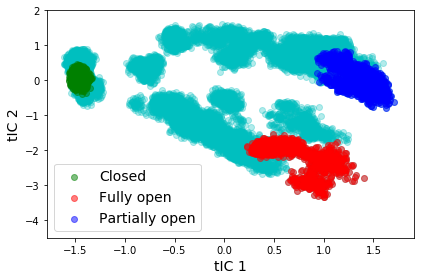

In [53]:

l = [i for i in range(38)]
l.pop(2)
l.pop(19)
l.pop(35)
#print(l)

for i in l:
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],color='c',alpha=0.3)
    
plt.scatter(tica_output[2].T[0],tica_output[2].T[1],color='g',alpha=0.5,label='Closed')
plt.scatter(tica_output[19].T[0],tica_output[19].T[1],color='r',alpha=0.5,label='Fully open')
plt.scatter(tica_output[35].T[0],tica_output[35].T[1],color='b',alpha=0.5,label='Partially open')




plt.legend(fontsize=14)
plt.ylim(-4.5,2)
plt.xlabel('tIC 1',fontsize=14)
plt.ylabel('tIC 2',fontsize=14)
plt.tight_layout()
plt.savefig('tica-distribution.pdf')

In [36]:
for i in range(38):
    f1 = open('tica-data/tic_traj_%d'%i,'w')
    print('#tIC 1     #tIC 2',file=f1)
    a = tica_output[i].T[0]
    b = tica_output[i].T[1]
    for j in range(len(tica_output[i].T[0])):
        print(a[j],b[j],file=f1)
    f1.close()

In [9]:
pca = pyemma.coordinates.pca(data, lag=1)
pca_output = pca.get_output()

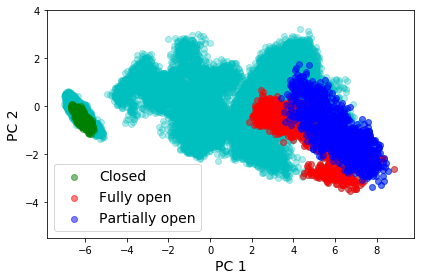

In [56]:
l = [i for i in range(38)]
l.pop(2)
l.pop(19)
l.pop(35)
#print(l)

for i in l:
    plt.scatter(pca_output[i].T[0],pca_output[i].T[1],color='c',alpha=0.3)

plt.scatter(pca_output[2].T[0],pca_output[2].T[1],color='g',alpha=0.5,label='Closed')
plt.scatter(pca_output[19].T[0],pca_output[19].T[1],color='r',alpha=0.5,label='Fully open')
plt.scatter(pca_output[35].T[0],pca_output[35].T[1],color='b',alpha=0.5,label='Partially open')
plt.legend(fontsize=14)
plt.ylim(-5.5,4)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.tight_layout()
plt.savefig('pca-distribution.pdf')

In [37]:

for i in range(38):
    f1 = open('pca-data/pc_traj_%d'%i,'w')
    print('#PC 1     #PC 2',file=f1)
    a = tica_output[i].T[0]
    b = tica_output[i].T[1]
    for j in range(len(tica_output[i].T[0])):
        print(a[j],b[j],file=f1)
    f1.close()
    

In [15]:
tica_concatenated = np.concatenate(tica_output)

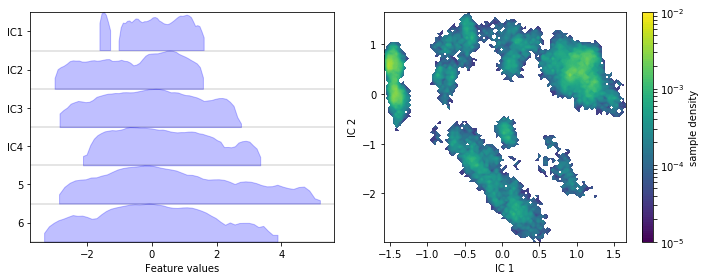

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated[:, :6],
    ax=axes[0],
    feature_labels=['IC1', 'IC2', 'IC3', 'IC4','5','6'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, 0:2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig('us-tica-dihedral-dist.pdf')

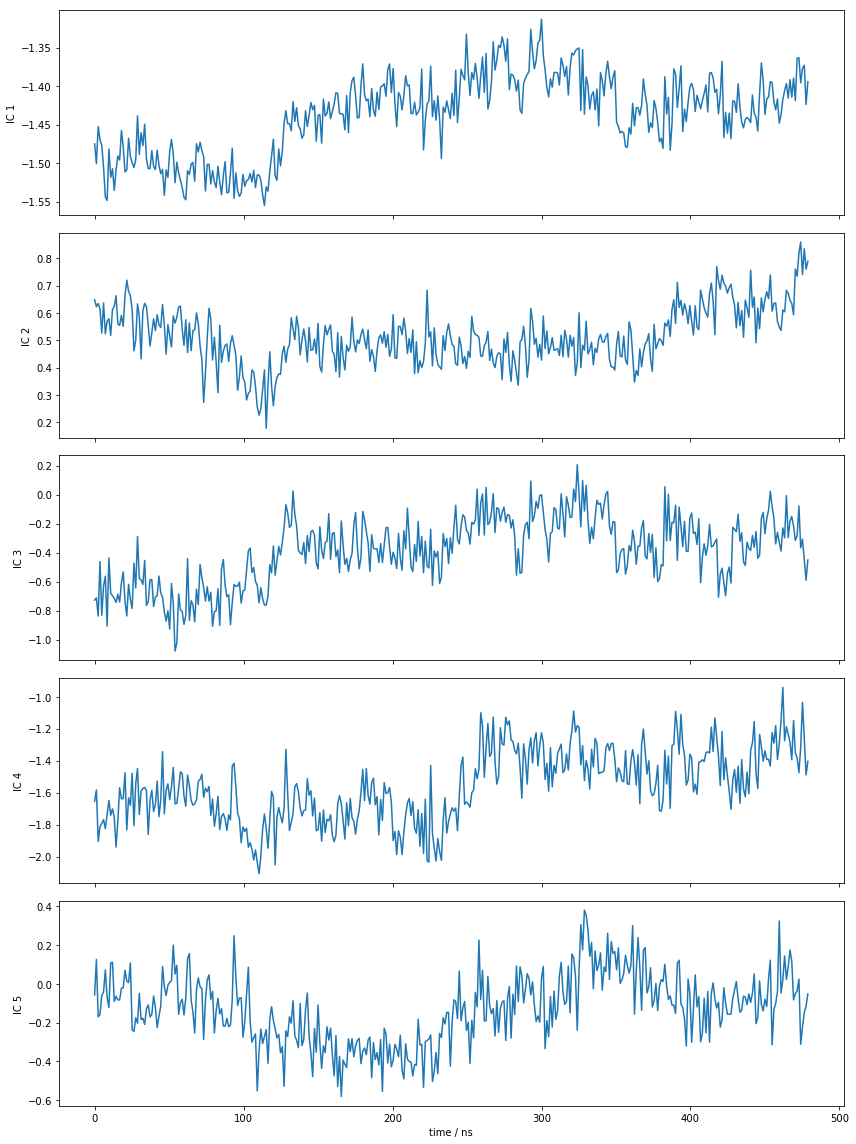

In [33]:
fig, axes = plt.subplots(5, 1, figsize=(12,16), sharex=True)
x = 1.2 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()